# `SMART FLOOD ALERT SYSTEM`

# OBJECTIVE :
Design and implement a Smart Flood Alert System that combines weather data analysis, flood prediction models, and SMS-based alert mechanisms to provide early flood warnings in vulnerable regions—particularly rural or low-connectivity areas.

# PROBLEM STATEMENT :
Flooding poses a significant threat to communities, leading to loss of life, property damage, and disruption of daily activities. Effective and timely flood prediction and alert systems are crucial for mitigating these impacts. However, developing and demonstrating such systems often requires access to complex real-time data streams, sophisticated hydrological models, and integration with external communication services, which can be challenging in a developmental or conceptual phase.
- The current challenge addressed by this Jupyter Notebook code is to conceptually demonstrate the core components of a smart flood alert system using simulated data and simplified models. Specifically, there is a need to:
- Simulate relevant environmental data (rainfall, water level) and historical flood events to create a dataset for analysis and model training.
- Implement and evaluate basic flood prediction logic, including both rules-based heuristics and a machine learning approach (Random Forest Classifier), to identify potential flood risks.
- Illustrate a simulated alert mechanism to demonstrate how warnings could be disseminated to affected populations.
- Provide fundamental data analysis and visualization capabilities to understand historical trends and current conditions.

# KEY GOALS INCLUDES :
- Flood Prediction
- SMS Alert System
- Risk Awareness and Damage Reduction
- Accessible and Scalable

# REQUIREMENTS :
- **pandas:** Used for data manipulation and analysis, primarily for creating and working with DataFrames (e.g., pd.DataFrame).
- **numpy:** Used for numerical operations, particularly within data generation and potentially for array manipulation.
- **datetime:** Python's built-in module for working with dates and times (e.g., datetime.now(), timedelta)
- **random:** Python's built-in module for generating random numbers, used for simulating data.
- **folium:** A Python library used for creating interactive maps and visualizing geographic data.
- **sklearn(Scikit-learn):** The primary machine learning library, specifically:
- **sklearn.model_selection.train_test_split:** For splitting data into training and testing sets.
- **sklearn.ensemble.RandomForestClassifier:** The implementation of the Random Forest algorithm.
- **sklearn.metrics:** For evaluating model performance, including accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, and classification_report.
- **matplotlib.pyplot:** A plotting library used for creating static, interactive, and animated visualizations (e.g., histograms, scatter plots, box plots).
- **seaborn:** A data visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics (e.g., histplot, countplot, scatterplot, boxplot, heatmap).

**Note:** This is a conceptual demonstration. For a real-world system, you would
integrate with actual weather APIs, more sophisticated hydrological models,
and SMS gateway services.

## IMPORTING REQUIRED LIBRARIES 

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import folium 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ( accuracy_score, precision_score,recall_score,f1_score,roc_auc_score, confusion_matrix,classification_report)
import matplotlib.pyplot as plt
import seaborn as sns
import twilio
print("IMPORTED👍👍")

IMPORTED👍👍


## DATA SIMULATION(Current Weather Data)

In [10]:
def generate_weather_data(num_entries=10):
    """Generates synthetic current weather data."""
    data = []
    locations = [
        'Haripur', 'Shantipur', 'Ramnagar', 'Krishnapur', 'Faizabad', 'Varanasi',
        'Cuttack', 'Guwahati', 'Patna', 'Surat', 'Kochi', 'Hyderabad',
        'Chennai', 'Pune', 'Bhopal', 'Jaipur'
    ]
    for i in range(num_entries):
        timestamp = datetime.now() - timedelta(minutes=i*30)
        rainfall_amount = round(random.uniform(5, 60), 2) 
        water_level = round(random.uniform(5, 12), 2)       
        temperature = round(random.uniform(20, 35), 1)    
        humidity = round(random.uniform(60, 95), 1)         
        location = random.choice(locations)
        data.append({
            'timestamp': timestamp,
            'location': location,
            'rainfall_amount_mm': rainfall_amount,
            'water_level_m': water_level,
            'temperature_c': temperature,
            'humidity_percent': humidity
        })
    return pd.DataFrame(data)

current_weather_df = generate_weather_data(num_entries=20)
print("\nSimulated Current Weather Data☔☂🌂:")
print(current_weather_df.head())


Simulated Current Weather Data☔☂🌂:
                   timestamp   location  rainfall_amount_mm  water_level_m  \
0 2025-07-07 04:23:01.525109  Shantipur               39.72           9.91   
1 2025-07-07 03:53:01.525109  Shantipur               17.13          11.23   
2 2025-07-07 03:23:01.525109      Surat               46.88           7.44   
3 2025-07-07 02:53:01.525109   Faizabad               33.78           9.24   
4 2025-07-07 02:23:01.525109     Bhopal               41.25           7.31   

   temperature_c  humidity_percent  
0           27.4              72.9  
1           30.5              74.9  
2           22.1              95.0  
3           29.4              69.1  
4           22.6              75.8  


## SIMULATING HISTORICAL FLOOD RECORD ( Data from past 5 years)

In [9]:
def generate_historical_flood_data(num_entries=15):
    """Generates synthetic historical flood records."""
    data = []
    locations = [
        'Haripur', 'Shantipur', 'Ramnagar', 'Krishnapur', 'Faizabad', 'Varanasi',
        'Cuttack', 'Guwahati', 'Patna', 'Surat', 'Kochi', 'Hyderabad',
        'Chennai', 'Pune', 'Bhopal', 'Jaipur'
    ]
    severities = ['Low', 'Medium', 'High']
    for i in range(num_entries):
        timestamp = datetime.now() - timedelta(days=random.randint(30, 365*5)) 
        rainfall_amount = round(random.uniform(40, 150), 2)
        water_level = round(random.uniform(9, 15), 2)
        location = random.choice(locations)
        severity = random.choice(severities)
        deaths = 0
        if severity == 'High':
            deaths = random.randint(1, 10)
        elif severity == 'Medium':
            deaths = random.randint(0, 3)
        
        data.append({
            'timestamp': timestamp,
            'location': location,
            'rainfall_amount_mm': rainfall_amount,
            'water_level_m': water_level,
            'severity': severity,
            'deaths': deaths
        })
    return pd.DataFrame(data)

historical_floods_df = generate_historical_flood_data(num_entries=30)
print("\nSimulated Historical Flood Records📙📑:")
print(historical_floods_df.head())


Simulated Historical Flood Records📙📑:
                   timestamp   location  rainfall_amount_mm  water_level_m  \
0 2025-05-07 04:21:52.410052     Jaipur               96.55          11.41   
1 2023-06-02 04:21:52.410052  Hyderabad              105.15          14.83   
2 2023-07-07 04:21:52.410052    Haripur              119.44           9.63   
3 2022-11-01 04:21:52.410052    Cuttack              136.41          13.79   
4 2025-01-27 04:21:52.410052   Faizabad              114.17          14.53   

  severity  deaths  
0   Medium       0  
1     High       2  
2      Low       0  
3   Medium       3  
4      Low       0  


## DATA ANALYSIS

In [19]:
if not historical_floods_df.empty:
    avg_rainfall_flood = historical_floods_df['rainfall_amount_mm'].mean()
    avg_water_level_flood = historical_floods_df['water_level_m'].mean()
    print(f"\nAverage Rainfall during Historical Floods: {avg_rainfall_flood:.2f} mm")
    print(f"Average Water Level during Historical Floods: {avg_water_level_flood:.2f} m")

if not historical_floods_df.empty:
    severity_counts = historical_floods_df['severity'].value_counts()
    print("\nHistorical Flood Severity Counts:")
    print(severity_counts)
    
if 'deaths' in historical_floods_df.columns and not historical_floods_df.empty:
    total_deaths = historical_floods_df['deaths'].sum()
    print(f"\nTotal Recorded Deaths from Historical Floods: {total_deaths}")


Average Rainfall during Historical Floods: 104.34 mm
Average Water Level during Historical Floods: 11.97 m

Historical Flood Severity Counts:
severity
Medium    12
High      10
Low        8
Name: count, dtype: int64

Total Recorded Deaths from Historical Floods: 79


## DATA VISULIZATION 

In [20]:
if not historical_floods_df.empty:
    print("\nDescriptive Statistics for Historical Flood Data:")
    print(historical_floods_df[['rainfall_amount_mm', 'water_level_m', 'deaths']].describe())


Descriptive Statistics for Historical Flood Data:
       rainfall_amount_mm  water_level_m     deaths
count           30.000000      30.000000  30.000000
mean           104.343333      11.973667   2.633333
std             25.465896       1.971536   3.034097
min             45.890000       9.020000   0.000000
25%             83.275000      10.212500   0.000000
50%            112.330000      12.160000   2.000000
75%            123.087500      13.600000   3.000000
max            138.750000      14.850000  10.000000


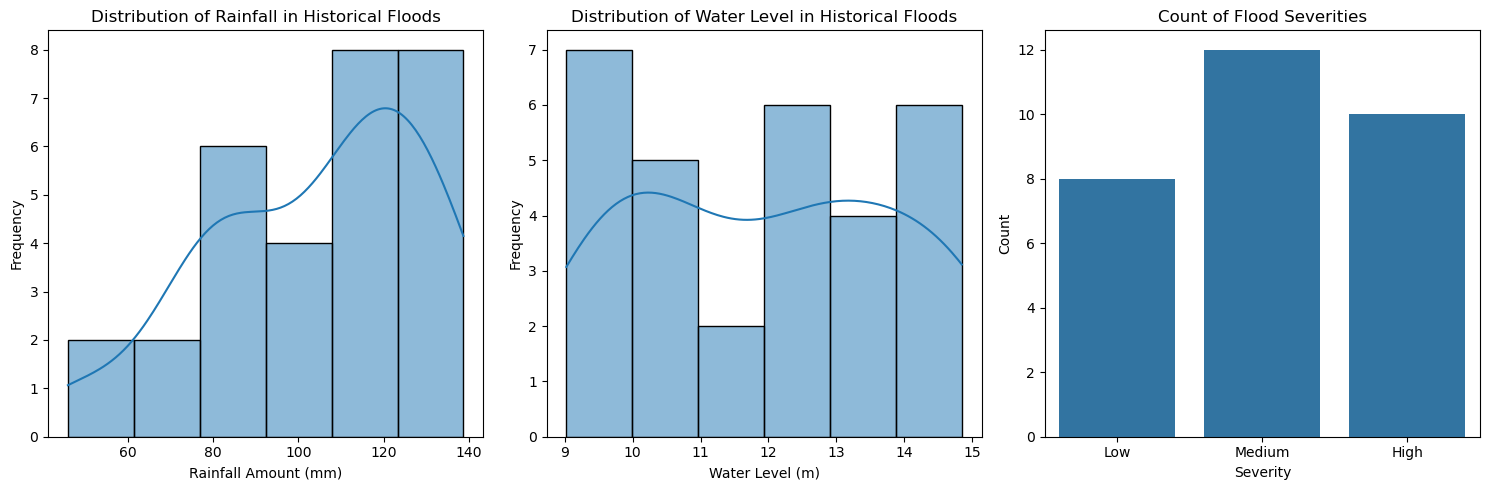

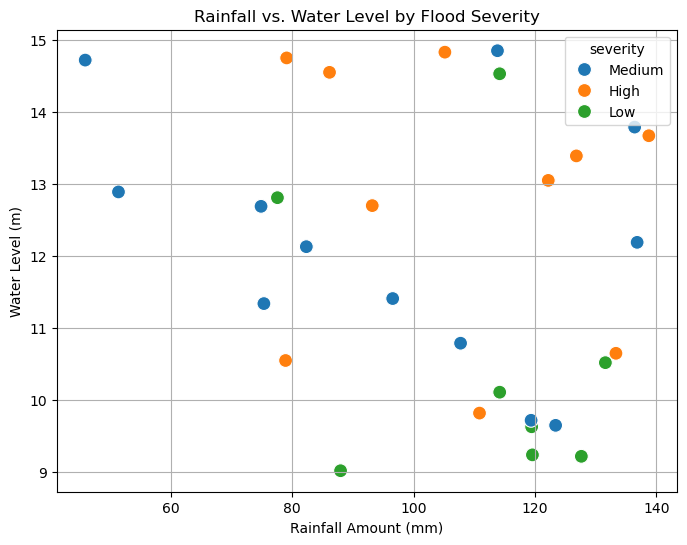

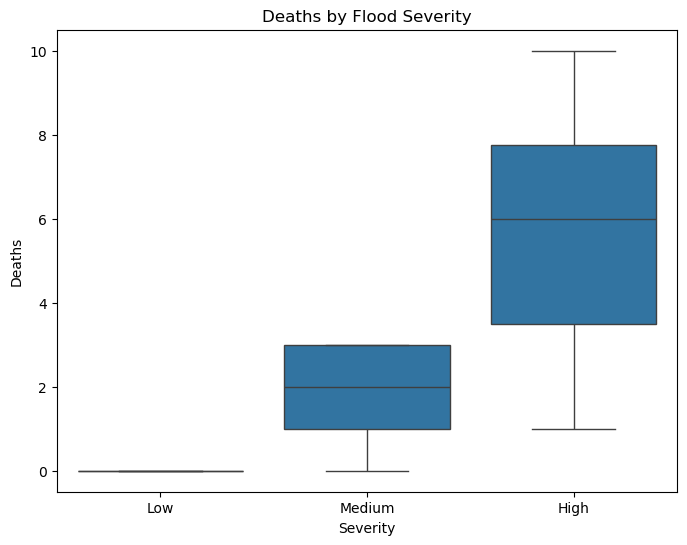

In [24]:
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    sns.histplot(historical_floods_df['rainfall_amount_mm'], kde=True)
    plt.title('Distribution of Rainfall in Historical Floods')
    plt.xlabel('Rainfall Amount (mm)')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 2)
    sns.histplot(historical_floods_df['water_level_m'], kde=True)
    plt.title('Distribution of Water Level in Historical Floods')
    plt.xlabel('Water Level (m)')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 3)
    sns.countplot(x='severity', data=historical_floods_df, order=['Low', 'Medium', 'High'])
    plt.title('Count of Flood Severities')
    plt.xlabel('Severity')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='rainfall_amount_mm', y='water_level_m', hue='severity', data=historical_floods_df, s=100)
    plt.title('Rainfall vs. Water Level by Flood Severity')
    plt.xlabel('Rainfall Amount (mm)')
    plt.ylabel('Water Level (m)')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='severity', y='deaths', data=historical_floods_df, order=['Low', 'Medium', 'High'])
    plt.title('Deaths by Flood Severity')
    plt.xlabel('Severity')
    plt.ylabel('Deaths')
    plt.show()


##  MACHINE LEARNING MODLE((Random Forest for Flood Prediction))

### X&Y ARRAY CREATON 

In [26]:
if not historical_floods_df.empty:
    historical_floods_df['is_flood'] = historical_floods_df['severity'].apply(
        lambda x: 1 if x in ['Medium', 'High'] else 0
    )

    X = historical_floods_df[['rainfall_amount_mm', 'water_level_m']]
    y = historical_floods_df['is_flood']

### TRAIN-TEST SPLIT 

In [27]:
if len(X) > 1: 
        if y.nunique() > 1 and y.value_counts().min() > 1:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
        else:
            print("Warning: Not enough unique classes or samples per class for stratified split. Performing non-stratified split.")
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### RANDOM FOREST 

In [28]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### MAKE PREDICTION 

In [31]:
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

### CHECKING PREDICTION SCORE 

In [33]:
print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")


Random Forest Model Performance:
Accuracy: 0.78
Precision: 0.86
Recall: 0.86
F1-Score: 0.86


### CHECKING ROC & AUC SCORE 

In [36]:
if len(np.unique(y_test)) > 1:
    try:
        print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.2f}")
    except ValueError as e:
        print(f"ROC AUC Score could not be computed: {e}")
    else:
        print("ROC AUC Score not applicable (only one class present in y_test).")

ROC AUC Score: 0.93
ROC AUC Score not applicable (only one class present in y_test).


### CONFUSION MATRIX 

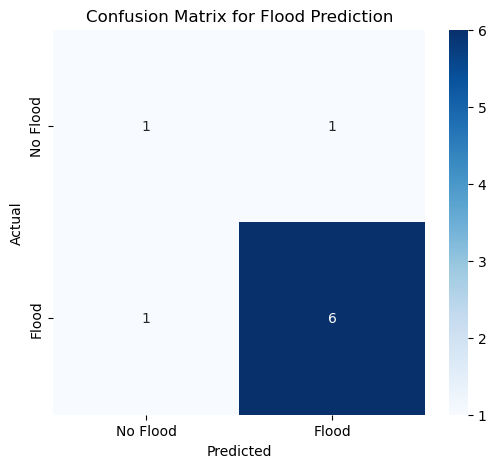


Classification Report:
              precision    recall  f1-score   support

    No Flood       0.50      0.50      0.50         2
       Flood       0.86      0.86      0.86         7

    accuracy                           0.78         9
   macro avg       0.68      0.68      0.68         9
weighted avg       0.78      0.78      0.78         9



In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Flood', 'Flood'],
            yticklabels=['No Flood', 'Flood'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Flood Prediction')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Flood', 'Flood']))

### FEATURE IMPORTENCE 

In [55]:
if X.shape[0] >= 2: 
    feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
    print("\nFeature Importances:")
    print(feature_importances.sort_values(ascending=False))
elif X.shape[0] >= 1: 
    print("Not enough historical flood data to train a meaningful ML model (less than 2 samples).")
else:
    print("No historical flood data available for training a machine learning model.")


Feature Importances:
water_level_m         0.553012
rainfall_amount_mm    0.446988
dtype: float64


## FLOOD PREDICITION LOGIC 

In [13]:
def predict_flood(rainfall, water_level):
    """
    Predicts flood risk based on simplified rules.
    Args:
        rainfall (float): Current rainfall amount in mm.
        water_level (float): Current water level in meters.
    Returns:
        tuple: (prediction_text, alert_type, local_language_message)
    """
    prediction_text = 'No immediate flood threat.'
    alert_type = 'No Alert'
    alert_message_local = 'कोई तत्काल बाढ़ का खतरा नहीं।' # Hindi: No immediate flood threat

    if rainfall > 50 and water_level > 10:
        prediction_text = 'HIGH RISK OF FLOOD! Heavy rainfall and high water levels detected.'
        alert_type = 'Flood Warning'
        alert_message_local = 'बाढ़ का उच्च जोखिम! भारी वर्षा और उच्च जल स्तर का पता चला है। कृपया सुरक्षित स्थान पर जाएं। (High risk of flood! Heavy rain and high water levels detected. Please move to a safe place.)'
    elif rainfall > 30 and water_level > 8:
        prediction_text = 'MODERATE RISK OF FLOOD. Increased rainfall and water levels.'
        alert_type = 'Flood Advisory'
        alert_message_local = 'बाढ़ का मध्यम जोखिम। वर्षा और जल स्तर में वृद्धि। सतर्क रहें। (Moderate risk of flood. Increased rain and water levels. Be alert.)'
    elif rainfall > 20:
        prediction_text = 'Potential for increased water levels due to rainfall. Monitor closely.'
        alert_type = 'Monitoring'
        alert_message_local = 'वर्षा के कारण जल स्तर बढ़ने की संभावना। बारीकी से निगरानी करें। (Potential for increased water levels due to rain. Monitor closely.)'

    return prediction_text, alert_type, alert_message_local

### TEST THE PREDICTION LOGIC(some example values)

In [14]:
test_rainfall_1 = 45
test_water_level_1 = 9.5
pred_text_1, alert_type_1, msg_1 = predict_flood(test_rainfall_1, test_water_level_1)
print(f"\nTest 1: Rainfall={test_rainfall_1}mm, Water Level={test_water_level_1}m")
print(f"  Prediction: {pred_text_1}")
print(f"  Alert Type: {alert_type_1}")
print(f"  Local Message: {msg_1}")

test_rainfall_2 = 60
test_water_level_2 = 11.0
pred_text_2, alert_type_2, msg_2 = predict_flood(test_rainfall_2, test_water_level_2)
print(f"\nTest 2: Rainfall={test_rainfall_2}mm, Water Level={test_water_level_2}m")
print(f"  Prediction: {pred_text_2}")
print(f"  Alert Type: {alert_type_2}")
print(f"  Local Message: {msg_2}")

test_rainfall_3 = 15
test_water_level_3 = 7.0
pred_text_3, alert_type_3, msg_3 = predict_flood(test_rainfall_3, test_water_level_3)
print(f"\nTest 3: Rainfall={test_rainfall_3}mm, Water Level={test_water_level_3}m")
print(f"  Prediction: {pred_text_3}")
print(f"  Alert Type: {alert_type_3}")
print(f"  Local Message: {msg_3}")


Test 1: Rainfall=45mm, Water Level=9.5m
  Prediction: MODERATE RISK OF FLOOD. Increased rainfall and water levels.
  Alert Type: Flood Advisory
  Local Message: बाढ़ का मध्यम जोखिम। वर्षा और जल स्तर में वृद्धि। सतर्क रहें। (Moderate risk of flood. Increased rain and water levels. Be alert.)

Test 2: Rainfall=60mm, Water Level=11.0m
  Prediction: HIGH RISK OF FLOOD! Heavy rainfall and high water levels detected.
  Alert Type: Flood Warning
  Local Message: बाढ़ का उच्च जोखिम! भारी वर्षा और उच्च जल स्तर का पता चला है। कृपया सुरक्षित स्थान पर जाएं। (High risk of flood! Heavy rain and high water levels detected. Please move to a safe place.)

Test 3: Rainfall=15mm, Water Level=7.0m
  Prediction: No immediate flood threat.
  Alert Type: No Alert
  Local Message: कोई तत्काल बाढ़ का खतरा नहीं।


## SIMULATE SMS ALERT AND LOG 

In [15]:
sms_alert_log = []

def send_sms_alert(location, message, alert_type, phone_numbers):
    """
    Simulates sending an SMS alert to specific numbers and logs it.
    Args:
        location (str): The location for which the alert is being sent.
        message (str): The alert message in local language.
        alert_type (str): The type of alert (e.g., 'Flood Warning').
        phone_numbers (list): A list of phone numbers (strings) to send the alert to.
    """
    timestamp = datetime.now()
    for number in phone_numbers:
        log_entry = {
            'timestamp': timestamp,
            'location': location,
            'alert_type': alert_type,
            'message': message,
            'recipient_number': number
        }
        sms_alert_log.append(log_entry)
        print(f"\n--- SIMULATED SMS ALERT ---")
        print(f"To: {number} (Villagers in {location})")
        print(f"Type: {alert_type}")
        print(f"Message ({timestamp.strftime('%Y-%m-%d %H:%M:%S')}): {message}")
        print(f"---------------------------\n")

## ADDING API 

In [5]:
from twilio.rest import Client
account_sid = "AC0a4aedb381157ccb0dec9339eba61529" 
auth_token = "8f12b5311f4220cc49b7278295dbaa3f"
client = Client(account_sid, auth_token)
numbers = ['+919453760084', '+919279039463', '+916200170615']
for number in numbers:
    try:
        client.messages.create(
            to=number,
            from_="+17432562152", # This is your Twilio Phone Number
            body='बाढ़ का मध्यम जोखिम। वर्षा और जल स्तर में वृद्धि। सतर्क रहें। (Moderate risk of flood. Increased rain and water levels. Be alert.)'
        )
        print(f"Actual SMS sent to {number} successfully!")
    except Exception as e:
        print(f"Failed to send SMS to {number}: {e}")

Actual SMS sent to +919453760084 successfully!
Failed to send SMS to +919279039463: HTTP 400 error: Unable to create record: The number +91927903XXXX is unverified. Trial accounts cannot send messages to unverified numbers; verify +91927903XXXX at twilio.com/user/account/phone-numbers/verified, or purchase a Twilio number to send messages to unverified numbers
Failed to send SMS to +916200170615: HTTP 400 error: Unable to create record: The number +91620017XXXX is unverified. Trial accounts cannot send messages to unverified numbers; verify +91620017XXXX at twilio.com/user/account/phone-numbers/verified, or purchase a Twilio number to send messages to unverified numbers


## PROCESS THE LATEST WEATHER DATA ENTRY FOR PREDICTON AND ALERT       

In [17]:
if not current_weather_df.empty:
    latest_weather = current_weather_df.iloc[0] 
    print(f"\nProcessing latest weather data for {latest_weather['location']}:")
    print(f"  Rainfall: {latest_weather['rainfall_amount_mm']}mm, Water Level: {latest_weather['water_level_m']}m")
    prediction_text, alert_type, alert_message_local = predict_flood(
        latest_weather['rainfall_amount_mm'],
        latest_weather['water_level_m']
    )
    print(f"  Prediction: {prediction_text}")
    dummy_phone_numbers = ['+919453760084', '+919279039463', '+916200170615']

    if alert_type in ['Flood Warning', 'Flood Advisory', 'Monitoring', 'All Clear']:
        send_sms_alert(latest_weather['location'], alert_message_local, alert_type, dummy_phone_numbers)
    else:
        print("No alert triggered for current conditions.")
else:
    print("No current weather data to process for prediction.")


Processing latest weather data for Shantipur:
  Rainfall: 39.72mm, Water Level: 9.91m
  Prediction: MODERATE RISK OF FLOOD. Increased rainfall and water levels.

--- SIMULATED SMS ALERT ---
To: +919453760084 (Villagers in Shantipur)
Type: Flood Advisory
Message (2025-07-07 04:31:44): बाढ़ का मध्यम जोखिम। वर्षा और जल स्तर में वृद्धि। सतर्क रहें। (Moderate risk of flood. Increased rain and water levels. Be alert.)
---------------------------


--- SIMULATED SMS ALERT ---
To: +919279039463 (Villagers in Shantipur)
Type: Flood Advisory
Message (2025-07-07 04:31:44): बाढ़ का मध्यम जोखिम। वर्षा और जल स्तर में वृद्धि। सतर्क रहें। (Moderate risk of flood. Increased rain and water levels. Be alert.)
---------------------------


--- SIMULATED SMS ALERT ---
To: +916200170615 (Villagers in Shantipur)
Type: Flood Advisory
Message (2025-07-07 04:31:44): बाढ़ का मध्यम जोखिम। वर्षा और जल स्तर में वृद्धि। सतर्क रहें। (Moderate risk of flood. Increased rain and water levels. Be alert.)
---------------

## DISPLAYING SIMULATED SMS ALERT 

In [18]:
print("\nSimulated SMS Alert Log:")
if sms_alert_log:
    for entry in sms_alert_log:
        print(f"- [{entry['timestamp'].strftime('%Y-%m-%d %H:%M:%S')}] {entry['location']} ({entry['alert_type']}) to {entry['recipient_number']}: {entry['message']}")
else:
    print("No alerts have been sent yet.")


Simulated SMS Alert Log:
- [2025-07-07 04:31:17] Shantipur (Flood Advisory) to +919453760084: बाढ़ का मध्यम जोखिम। वर्षा और जल स्तर में वृद्धि। सतर्क रहें। (Moderate risk of flood. Increased rain and water levels. Be alert.)
- [2025-07-07 04:31:17] Shantipur (Flood Advisory) to +919279039463: बाढ़ का मध्यम जोखिम। वर्षा और जल स्तर में वृद्धि। सतर्क रहें। (Moderate risk of flood. Increased rain and water levels. Be alert.)
- [2025-07-07 04:31:17] Shantipur (Flood Advisory) to +916200170615: बाढ़ का मध्यम जोखिम। वर्षा और जल स्तर में वृद्धि। सतर्क रहें। (Moderate risk of flood. Increased rain and water levels. Be alert.)
- [2025-07-07 04:31:44] Shantipur (Flood Advisory) to +919453760084: बाढ़ का मध्यम जोखिम। वर्षा और जल स्तर में वृद्धि। सतर्क रहें। (Moderate risk of flood. Increased rain and water levels. Be alert.)
- [2025-07-07 04:31:44] Shantipur (Flood Advisory) to +919279039463: बाढ़ का मध्यम जोखिम। वर्षा और जल स्तर में वृद्धि। सतर्क रहें। (Moderate risk of flood. Increased rain and

## MAP VISULIZATION 

#### ADDING BORDER RANGE OF CITIES 

In [62]:
village_coords = {
    'Haripur': [25.5941, 85.1376],   
    'Shantipur': [22.5726, 88.3639], 
    'Ramnagar': [26.8467, 80.9462], 
    'Krishnapur': [28.6139, 77.2090], 
    'Faizabad': [26.7766, 82.1963],   
    'Varanasi': [25.3176, 82.9739],    
    'Cuttack': [20.4631, 85.8821],    
    'Guwahati': [26.1445, 91.7362],  
    'Patna': [25.5941, 85.1376],      
    'Surat': [21.1702, 72.8311],       
    'Kochi': [9.9312, 76.2673],       
    'Hyderabad': [17.3850, 78.4867], 
    'Chennai': [13.0827, 80.2707],    
    'Pune': [18.5204, 73.8567],       
    'Bhopal': [23.2599, 77.4126],    
    'Jaipur': [26.9124, 75.7873]      
}

#### ADDING DIVERSE RISK ASSIGNMENTS 

In [63]:
m = folium.Map(location=[22.0, 78.0], zoom_start=5) 
simulated_risk = {
    'Haripur': 'No Alert',
    'Shantipur': 'No Alert',
    'Ramnagar': 'Flood Warning',
    'Krishnapur': 'Monitoring',
    'Faizabad': 'No Alert',
    'Varanasi': 'Flood Advisory',
    'Cuttack': 'Flood Warning', 
    'Guwahati': 'Flood Warning', 
    'Patna': 'Flood Advisory',
    'Surat': 'No Alert',
    'Kochi': 'Monitoring',
    'Hyderabad': 'No Alert',
    'Chennai': 'Flood Advisory',
    'Pune': 'Monitoring',
    'Bhopal': 'No Alert',
    'Jaipur': 'No Alert'
}

#### ADDING MARKS ON RISKY CITY/VILLAGE 

In [65]:
for village, coords in village_coords.items():
    risk_level = simulated_risk.get(village, 'No Alert')
    marker_color = 'blue' # Default color
    icon_type = 'info-sign' # Default icon

    if risk_level == 'Flood Warning':
        marker_color = 'red'
        icon_type = 'exclamation-sign'
    elif risk_level == 'Flood Advisory':
        marker_color = 'orange'
        icon_type = 'warning-sign'
    elif risk_level == 'Monitoring':
        marker_color = 'yellow'
        icon_type = 'eye-open'

    folium.Marker(
        location=coords,
        popup=f"<b>{village}</b><br>Lat: {coords[0]}, Lon: {coords[1]}<br>Risk: {risk_level}",
        tooltip=village,
        icon=folium.Icon(color=marker_color, icon=icon_type)
    ).add_to(m)

print("\nMap of Villages/Cities (with simulated flood risk highlighting🗺🗺:")
m


Map of Villages/Cities (with simulated flood risk highlighting🗺🗺:


C:\Users\DELL\AppData\Local\Temp\ipykernel_12640\3114939424.py:20: UserWarning: color argument of Icon should be one of: {'orange', 'lightred', 'blue', 'darkpurple', 'lightgray', 'darkgreen', 'darkred', 'lightgreen', 'darkblue', 'green', 'lightblue', 'cadetblue', 'white', 'red', 'beige', 'pink', 'purple', 'gray', 'black'}.
  icon=folium.Icon(color=marker_color, icon=icon_type)
